In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mlxtend.data import loadlocal_mnist

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

In [2]:
train_images, train_labels = loadlocal_mnist(
    images_path='../data/fmnist/train-images-idx3-ubyte-2', labels_path='../data/fmnist/train-labels-idx1-ubyte-2')
test_images, test_labels = loadlocal_mnist(
    images_path='../data/fmnist/t10k-images-idx3-ubyte-2', labels_path='../data/fmnist/t10k-labels-idx1-ubyte-2')

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15)


X_train, y_train = train_images, train_labels
X_test, y_test = test_images,test_labels
X_val, y_val = val_images, val_labels

### 3.1 plot loss vs epoch for activation functions

In [4]:
def train(activation, learning_rate = 0.001, hidden_layer_sizes = (256, 32)):
    epochs = 50
    mlp = MLPClassifier(activation = activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=epochs, batch_size=40, learning_rate_init=learning_rate)
    
    train_loss = []
    val_loss = []
    
    for i in range(epochs):
        mlp.partial_fit(X_train, y_train, np.unique(y_train))
        pred = mlp.predict_proba(X_val)
        val_loss.append(log_loss(y_val,pred))
    
    train_loss = mlp.loss_curve_
    return mlp, train_loss, val_loss


accuracy for logistic: 0.8033
accuracy for sigmoid: 0.8033


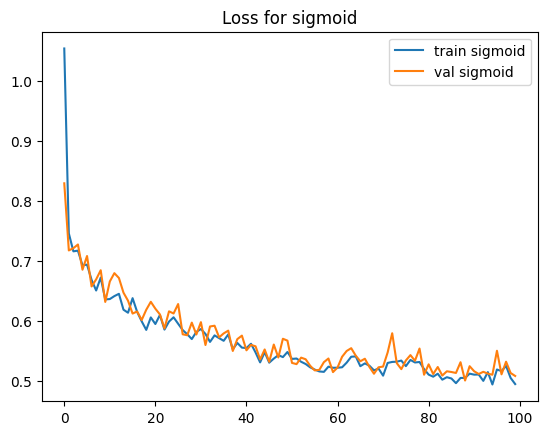

accuracy for relu: 0.8664
accuracy for relu: 0.8664


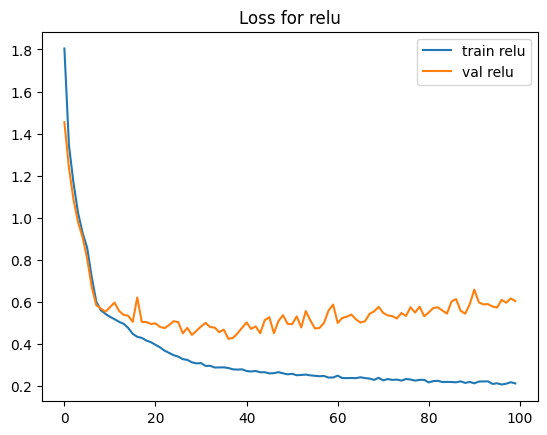

accuracy for tanh: 0.7614
accuracy for tanh: 0.7614


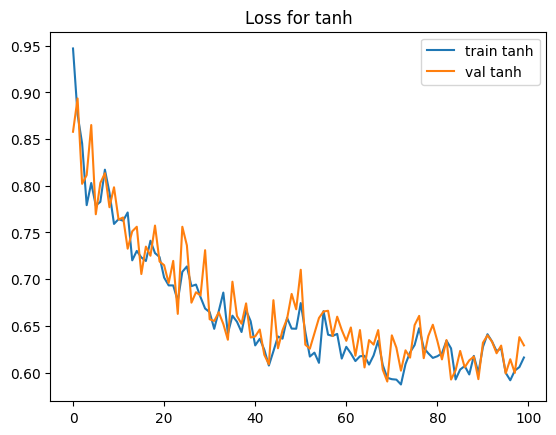

accuracy for identity: 0.8161
accuracy for linear: 0.8161


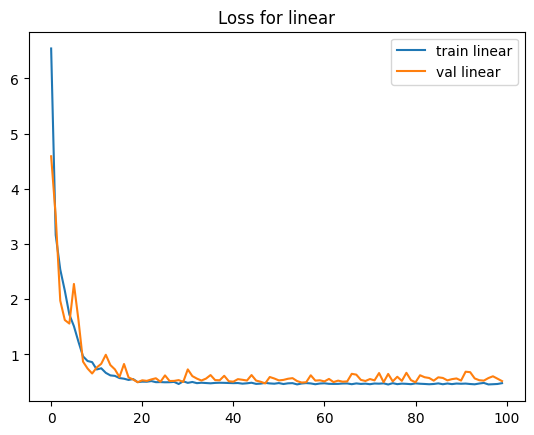

In [5]:
for activation in [('logistic', 'sigmoid'), ('relu', 'relu'), ('tanh', 'tanh'), ('identity', 'linear')]:

    mlp, train_loss, val_loss = train(activation[0])
    
    print(
        f'accuracy for {activation[1]}: {mlp.score(test_images, test_labels)}')
    
    plt.plot(train_loss, label=f'train {activation[1]}')
    plt.plot(val_loss, label=f'val {activation[1]}')
    plt.legend()
    plt.title(f'Loss for {activation[1]}')
    

    plt.show()


### 3.2 plot accuracy vs epoch for learning rate

accuracy for learning_rate = 0.1: 0.1


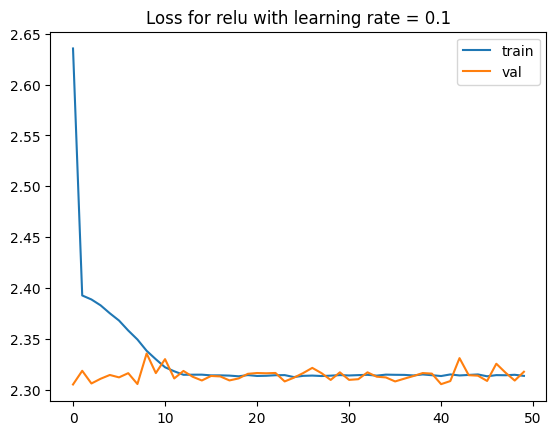

accuracy for learning_rate = 0.01: 0.1


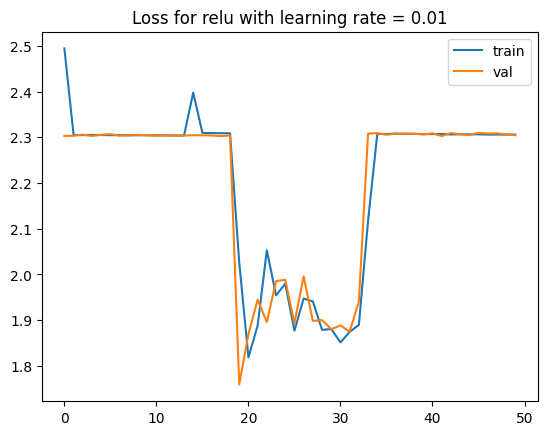

accuracy for learning_rate = 0.001: 0.8681


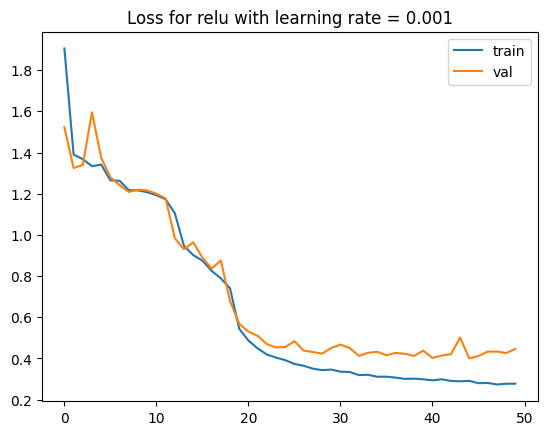

In [5]:
for learning_rate in [0.1, 0.01, 0.001]:

    mlp, train_loss, val_loss = train('relu', learning_rate=learning_rate)

    print(
        f'accuracy for learning_rate = {learning_rate}: {mlp.score(test_images, test_labels)}')

    plt.plot(train_loss, label=f'train')
    plt.plot(val_loss, label=f'val')
    plt.legend()
    plt.title(f'Loss for relu with learning rate = {learning_rate}')

    plt.show()


In [6]:
for hidden_layer_sizes in [(128, 16), (512, 64), (1024, 128)]:
    learning_rate = 0.001
    mlp, train_loss, val_loss = train('relu', learning_rate = learning_rate, hidden_layer_sizes=hidden_layer_sizes)

    print(
        f'accuracy for hidden_layer_size = {hidden_layer_sizes}: {mlp.score(test_images, test_labels)}')

    plt.plot(train_loss, label=f'train')
    plt.plot(val_loss, label=f'val')
    plt.legend()
    plt.title(
        f'Loss for relu with learning rate = {learning_rate} and hidden_layer_sizes = {hidden_layer_sizes}')

    plt.show()


In [ ]:
mlp = MLPClassifier(max_iter=50)

parameters = {
    'hidden_layer_sizes': [(128, 16), (512, 64), (1024, 128)],
    'activation': ['logistic', 'relu', 'tanh', 'identity'],
    'batch_size': [40, 160]
}
clf = GridSearchCV(mlp, parameters)

clf.best_params_



    